In [1]:
# import collections
import os
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats.stats as stats
import re
import gc
import traceback
import string
import time
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas.core.algorithms as algos

from sklearn.cluster import KMeans
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import RandomForestClassifier
from pandas import Series
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config Completer.use_jedi = False
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kwargs = dict(skipinitialspace=True,engine='c',encoding='ISO-8859-1')

#Setting Current Directory where files will save to & be read from
os.chdir('C:/Users/n432209/Desktop/Aetna-Local Files/DSNP')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

kwargs = dict(skipinitialspace=True,engine='c',encoding='ISO-8859-1')

# Heartland Columns

In [2]:
heartland_cols = ['MEDICARE_NUMBER',
 'SRC_MEMBER_ID',
 'CONTRACT_NUMBER',
 'PBP',
 'NEW_MARKET',
 'SNP',
 'LIS_FLAG',
 'DUAL_STATUS',
 'CMS_COUNTY',
 'CMS_STATE',
 'MA_REGION',
 'NEW_REGION',
 'MA_TERRITORY',
 'AGE',
 'GENDER',
 'YEAR_EFF',
 'MONTH_EFF',
 'QUARTER_EFF',
 'CITY',
 'STATE',
 'ZIP',
 'SALES_CHANNEL',
 'NEW_EFF_DATE',
 'NEW_TERM_DATE',
 'EFF_YEAR',
 'EFF_MONTH',
 'EFF_DAY',
 'DSNP_MARKET',
 'ABDOMEN_RELATED_DISORDER',
 'ALLERGY',
 'AUTOIMMUNE_DISEASE',
 'BLOOD_RELATED_DISORDER',
 'CANCER',
 'DEMENTIA',
 'DIABETES',
 'DENTAL',
 'EAR',
 'FATIGUE',
 'HEART_RELATED_DISORDER',
 'HEPATITUS',
 'HIV',
 'HYPERLIPIDEMIA',
 'HYPERTENSION',
 'LUNGS_RELATED_DISORDER',
 'LYME_DISEASE',
 'MENTAL_DISORDER',
 'NEURAL',
 'OBESITY',
 'ORTHOPEDIC',
 'PERIPHERAL_ARTERY_DISEASE',
 'PROSTATE',
 'RENAL',
 'REPRODUCTIVE',
 'THYROID_DISORDER',
 'VISION_RELATED_DISORDER',
 'HIGH_NEED_GROUP',
 'TERM_YEAR',
 'TERM_MONTH',
 'TENURE_IN_DAYS',
 'TENURE_IN_MONTHS',
 'LAST_6MON_LAB_VISITS',
 'LAST_6MON_DENIED_CLAIMS',
 'LAST_6MON_CALLS',
 'LAST_6MON_PAR_CLAIMS',
 'LAST_6MON_PAR_VISITS',
 'LAST_6MON_NON_PAR_VISITS',
 'LAST_6MON_DENTAL_VISITS',
 'LAST_6MON_EMERGENCY_VISITS',
 'LAST_6MON_PCP_VISITS',
 'LAST_6MON_SPECIALIST_VISITS',
 'LAST_6MON_AMBULANCE_EVENTS',
 'LAST_6MON_BEHAVIORAL_HEALTH_VISITS',
 'LAST_6MON_IP_VISITS',
 'LAST_6MON_AETNA_MEDICAL_PAID_AMOUNT',
 'LAST_6MON_MEMBER_MEDICAL_PAID_AMOUNT',
 'LAST_6MON_GRIEVANCES',
 'LAST_6MON_CTM',
 'DISTINCT_GPI',
 'MED_RISK_SCORE',
 'CAPITATION_AMT',
 'GROUP_ID',
 'GROUP_NAME',
 'TIN',
 'TIN_NAME',
 'VBC',
 'PROVIDER_ID',
 'PROVIDER_NAME',
 'HICN_NBR',
 'INDIVIDUAL_ID',
 'MEMBER_ID',
 'FIPS',
 'SOCIAL_ISOLATION_INDEX_NORMALIZED',
 '6_MONTH_UTILIZATION',
 'MEMBER_EXPERIENCE',
 'HEALTH_CONDITIONS',
 'MEDICAL_COST',
 'CLINICAL_CLUSTERS']

# ACS columns

In [3]:
cols = ['published_year','zcta', 'tot_disability', 'tot_population', 'tot_popul_abv16', 'earning_25to50k',
'earning_50to100k', 'earning_above100k', 'edu_attain_tot_popul', 'bachlr_deg_abv18',
'gradprof_deg_abv18', 'food_stamps_tot_popul', 'hh_foodstamps_abv60', 'with_hlth_ins_cov',
'tot_hic_popul', 'tot_hh', 'hh_marriedcouple', 'hh_livingalone', 'tot_50to100k', 'tot_100to200k',
'tot_above200k', 'tot_household_income_popul', 'tot_widowed', 'tot_divorced', 'tot_marital_statu_popul',
'white_popul', 'tot_population_by_race_popul', 'africanamerican_popul', 'tot_mode_of_trans_popul', 'wrktrnsprt_pubtrnsprt']

# ACS Dataset

In [4]:
acs=pd.read_csv('//mbip/medicarepBI/Projects/COE/Retention/Deliverables/DSNP_Clustering/ACS1_DATA.csv', **kwargs, 
                usecols = cols,
                dtype={'zcta':'str'})
print(acs.shape)
acs.head()

#aggregate this file to zip lvl

(1215011, 30)


,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,food_stamps_tot_popul,hh_foodstamps_abv60,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year
0,00610,6841,27898,9089,1249,332,21,22034,2512,626,9210,2132,27106.000,27898.000,9210.000,2412.000,2205.000,793.000,102.000,16.000,9210.000,1726.000,3111.000,23244.000,16259.000,27976.000,1018.000,210095.000,0.000,2016
1,00612,10691,64572,18437,3866,1233,286,50367,8467,2791,22971,4863,60850.000,64572.000,22971.000,7471.000,5647.000,2944.000,356.000,73.000,0.000,4228.000,8159.000,53181.000,53756.000,64816.000,3252.000,527177.000,0.000,2015
2,00622,1301,7336,1450,363,88,87,5887,845,284,2503,534,7077.000,7336.000,2503.000,403.000,805.000,234.000,53.000,56.000,2503.000,471.000,848.000,6188.000,4530.000,7385.000,95.000,45498.000,0.000,2016
3,00631,324,1689,405,70,15,0,1398,217,11,648,285,1579.000,1689.000,648.000,143.000,235.000,46.000,0.000,0.000,648.000,173.000,189.000,1451.000,1235.000,1689.000,0.000,13116.000,0.000,2016
4,00647,2016,5711,1386,180,28,0,4722,559,148,1818,517,5468.000,5711.000,1818.000,458.000,452.000,122.000,4.000,0.000,1818.000,525.000,409.000,4890.000,4614.000,5711.000,98.000,36715.000,0.000,2016


# Slicing Data by Year

In [5]:
acs_2016=acs[acs['published_year']==2016]
print('Shape of 2016: ' + str(acs_2016.shape))
print('Missing 2016 Zips: ' + str(acs_2016.zcta.isnull().sum()))

Shape of 2016: (327454, 30)
Missing 2016 Zips: 294334


In [6]:
acs_2016[acs_2016.zcta.isin(acs_2016.zcta.duplicated())]

,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,food_stamps_tot_popul,hh_foodstamps_abv60,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year


# Summarizing 2016 ACS data at Zip Level

In [7]:
acs_grouped = acs_2016.groupby(['zcta']).agg('sum').reset_index()
print(acs_grouped.shape)
acs_grouped.head()

(33120, 30)


,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,food_stamps_tot_popul,hh_foodstamps_abv60,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year
0,00601,3616,17754,4435,1009,149,58,13670,1985,376,5959,1240,16503.000,17754.000,5959.000,1861.000,1322.000,415.000,103.000,14.000,5959.000,855.000,2100.000,14472.000,14436.000,17800.000,108.000,121080.000,0.000,2016
1,00602,10792,39674,12454,1912,431,51,31483,4331,1764,12785,2613,37497.000,39674.000,12785.000,3277.000,3036.000,1267.000,214.000,0.000,12785.000,2089.000,4218.000,33160.000,22941.000,39716.000,968.000,345354.000,0.000,2016
2,00603,11700,49940,14697,2899,1051,282,40573,6292,2262,18828,3587,47081.000,49940.000,18828.000,5599.000,5040.000,2108.000,450.000,104.000,18828.000,2955.000,6139.000,42696.000,35176.000,51565.000,2149.000,333713.000,0.000,2016
3,00606,576,6320,1642,97,0,0,5038,409,77,1975,563,6167.000,6320.000,1975.000,545.000,456.000,46.000,0.000,0.000,1975.000,377.000,564.000,5304.000,3739.000,6320.000,175.000,32363.000,0.000,2016
4,00610,6841,27898,9089,1249,332,21,22034,2512,626,9210,2132,27106.000,27898.000,9210.000,2412.000,2205.000,793.000,102.000,16.000,9210.000,1726.000,3111.000,23244.000,16259.000,27976.000,1018.000,210095.000,0.000,2016


In [8]:
acs_2016.zcta.nunique()

33120

In [9]:
#DISABILITY
acs_grouped['Disability_Ratio'] = acs_grouped.tot_disability/acs_grouped.tot_population

#INCOME
acs_grouped['25Kto50K_earnings_Ratio'] = acs_grouped.earning_25to50k/acs_grouped.tot_popul_abv16
#acs_grouped['50Kto100K_earnings_Ratio'] = acs_grouped.earning_50to100k/acs_grouped.tot_popul_abv16
#acs_grouped['Above100K_earnings_Ratio'] = acs_grouped.earning_above100k/acs_grouped.tot_popul_abv16
acs_grouped['Above_50K_earnings_Ratio'] = (acs_grouped.earning_50to100k+acs_grouped.earning_above100k)/acs_grouped.tot_popul_abv16

#EDUCATION
#acs_grouped['Bachelor_Degree_Above18_Ratio'] = acs_grouped.bachlr_deg_abv18/acs_grouped.edu_attain_tot_popul
#acs_grouped['GraduateProf_Degree_Above18_Ratio'] = acs_grouped.gradprof_deg_abv18/acs_grouped.edu_attain_tot_popul
acs_grouped['Higher_Education_Ratio'] = (acs_grouped.bachlr_deg_abv18+acs_grouped.gradprof_deg_abv18)/acs_grouped.edu_attain_tot_popul

#FOODSTAMPS
acs_grouped['HH_Foodstamps_Above60_Ratio'] = acs_grouped.hh_foodstamps_abv60/acs_grouped.food_stamps_tot_popul

#HEALTH INSURANCE
acs_grouped['With_Health_Insurance_Coverage_Ratio'] = acs_grouped.with_hlth_ins_cov/acs_grouped.tot_hic_popul

#LIVING ALONE
acs_grouped['HH_Married_Couple_Ratio'] = acs_grouped.hh_marriedcouple/acs_grouped.tot_hh
acs_grouped['HH_Living_Alone_Ratio'] = acs_grouped.hh_livingalone/acs_grouped.tot_hh

#HOUSEHOLD INCOME
#acs_grouped['Total_50Kto100K_Ratio'] = acs_grouped.tot_50to100k/acs_grouped.tot_household_income_popul
#acs_grouped['Total_100Kto200K_Ratio'] = acs_grouped.tot_100to200k/acs_grouped.tot_household_income_popul
#acs_grouped['Total_Above200K_Ratio'] = acs_grouped.tot_above200k/acs_grouped.tot_household_income_popul

#WIDOWED/DIVORCED
#acs_grouped['Total_Widowed_Ratio'] = acs_grouped.tot_widowed/acs_grouped.tot_marital_statu_popul
#acs_grouped['Total_Divorced_Ratio'] = acs_grouped.tot_divorced/acs_grouped.tot_marital_statu_popul
acs_grouped['Total_Widowed_Divorced_Ratio'] = (acs_grouped.tot_divorced+acs_grouped.tot_divorced)/acs_grouped.tot_marital_statu_popul

#RACE
acs_grouped['White_Pop_Ratio'] = acs_grouped.white_popul/acs_grouped.tot_population_by_race_popul
acs_grouped['African_American_Pop_Ratio'] = acs_grouped.africanamerican_popul/acs_grouped.tot_population_by_race_popul
#acs_grouped['Asian_Pop_Ratio'] = acs_grouped.asian/acs_grouped.tot_population_by_race_popul

#TRANSPORTATION
#acs_grouped['Work_Transport_CarVanTruck_Ratio'] = acs_grouped.wrktrnsprt_carvantrck/acs_grouped.tot_mode_of_trans_popul
acs_grouped['Work_Transport_Public_Ratio'] = acs_grouped.wrktrnsprt_pubtrnsprt/acs_grouped.tot_mode_of_trans_popul

acs_grouped.head()

,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,food_stamps_tot_popul,hh_foodstamps_abv60,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Above60_Ratio,With_Health_Insurance_Coverage_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio
0,00601,3616,17754,4435,1009,149,58,13670,1985,376,5959,1240,16503.000,17754.000,5959.000,1861.000,1322.000,415.000,103.000,14.000,5959.000,855.000,2100.000,14472.000,14436.000,17800.000,108.000,121080.000,0.000,2016,0.204,0.228,0.047,0.173,0.208,0.930,0.312,0.222,0.290,0.811,0.006,0.000
1,00602,10792,39674,12454,1912,431,51,31483,4331,1764,12785,2613,37497.000,39674.000,12785.000,3277.000,3036.000,1267.000,214.000,0.000,12785.000,2089.000,4218.000,33160.000,22941.000,39716.000,968.000,345354.000,0.000,2016,0.272,0.154,0.039,0.194,0.204,0.945,0.256,0.237,0.254,0.578,0.024,0.000
2,00603,11700,49940,14697,2899,1051,282,40573,6292,2262,18828,3587,47081.000,49940.000,18828.000,5599.000,5040.000,2108.000,450.000,104.000,18828.000,2955.000,6139.000,42696.000,35176.000,51565.000,2149.000,333713.000,0.000,2016,0.234,0.197,0.091,0.211,0.191,0.943,0.297,0.268,0.288,0.682,0.042,0.000
3,00606,576,6320,1642,97,0,0,5038,409,77,1975,563,6167.000,6320.000,1975.000,545.000,456.000,46.000,0.000,0.000,1975.000,377.000,564.000,5304.000,3739.000,6320.000,175.000,32363.000,0.000,2016,0.091,0.059,0.000,0.096,0.285,0.976,0.276,0.231,0.213,0.592,0.028,0.000
4,00610,6841,27898,9089,1249,332,21,22034,2512,626,9210,2132,27106.000,27898.000,9210.000,2412.000,2205.000,793.000,102.000,16.000,9210.000,1726.000,3111.000,23244.000,16259.000,27976.000,1018.000,210095.000,0.000,2016,0.245,0.137,0.039,0.142,0.231,0.972,0.262,0.239,0.268,0.581,0.036,0.000


## Heartland Base Dataset

In [10]:
heartland_df = pd.read_csv('//mbip/medicarepBI/Projects/COE/Retention/Deliverables/DSNP_Clustering/Final_Data_Sets/heartland_base_with_ratios_20200826.csv',
                    usecols = heartland_cols, **kwargs,dtype={'ZIP':'str'})
print(heartland_df.shape)
heartland_df.head(3)

(4005, 97)


,MEDICARE_NUMBER,SRC_MEMBER_ID,INDIVIDUAL_ID,MEMBER_ID,CONTRACT_NUMBER,PBP,NEW_MARKET,SNP,LIS_FLAG,DUAL_STATUS,CMS_COUNTY,CMS_STATE,MA_REGION,NEW_REGION,MA_TERRITORY,AGE,GENDER,YEAR_EFF,MONTH_EFF,QUARTER_EFF,CITY,STATE,ZIP,SALES_CHANNEL,NEW_EFF_DATE,NEW_TERM_DATE,EFF_YEAR,EFF_MONTH,EFF_DAY,DSNP_MARKET,ABDOMEN_RELATED_DISORDER,ALLERGY,AUTOIMMUNE_DISEASE,BLOOD_RELATED_DISORDER,CANCER,DEMENTIA,DIABETES,DENTAL,EAR,FATIGUE,HEART_RELATED_DISORDER,HEPATITUS,HIV,HYPERLIPIDEMIA,HYPERTENSION,LUNGS_RELATED_DISORDER,LYME_DISEASE,MENTAL_DISORDER,NEURAL,OBESITY,ORTHOPEDIC,PERIPHERAL_ARTERY_DISEASE,PROSTATE,RENAL,REPRODUCTIVE,THYROID_DISORDER,VISION_RELATED_DISORDER,HIGH_NEED_GROUP,TERM_YEAR,TERM_MONTH,TENURE_IN_DAYS,TENURE_IN_MONTHS,LAST_6MON_LAB_VISITS,LAST_6MON_DENIED_CLAIMS,LAST_6MON_CALLS,LAST_6MON_PAR_CLAIMS,LAST_6MON_PAR_VISITS,LAST_6MON_NON_PAR_VISITS,LAST_6MON_DENTAL_VISITS,LAST_6MON_EMERGENCY_VISITS,LAST_6MON_PCP_VISITS,LAST_6MON_SPECIALIST_VISITS,LAST_6MON_AMBULANCE_EVENTS,LAST_6MON_BEHAVIORAL_HEALTH_VISITS,LAST_6MON_IP_VISITS,LAST_6MON_AETNA_MEDICAL_PAID_AMOUNT,LAST_6MON_MEMBER_MEDICAL_PAID_AMOUNT,LAST_6MON_GRIEVANCES,LAST_6MON_CTM,DISTINCT_GPI,MED_RISK_SCORE,CAPITATION_AMT,GROUP_ID,GROUP_NAME,TIN,TIN_NAME,VBC,PROVIDER_ID,PROVIDER_NAME,HICN_NBR,FIPS,SOCIAL_ISOLATION_INDEX_NORMALIZED,6_MONTH_UTILIZATION,MEMBER_EXPERIENCE,HEALTH_CONDITIONS,MEDICAL_COST,CLINICAL_CLUSTERS
0,1A93F62HC09,101000000000.000,7981740000000.000,10109800000000.000,H5325,5,HEARTLAND,Y,2,2,JEFFERSON,MO,NORTHCENTRAL,NORTHCENTRAL,MO_SAINT_LOUIS,54,F,2020,January,Q1,House Springs,MO,63051,CareFree,10/1/2019,4/30/2020,2019,10,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2020,4,304,10,0,0,0,2,2,0,0,0,0,2,0,0,0,144.950,144.300,0,0,6,0,0,919089220,"Ross, Kenneth E",830389948,"Ross, Kenneth E",VBC,455557609,"Ross, Kenneth E",1A93F62HC09,29099,46.260,2,0,2,289.250,4
1,1AQ7E08RH37,101000000000.000,53464430688.000,10106900000000.000,H5325,2,HEARTLAND,Y,2,1,SEDGWICK,KS,NORTHCENTRAL,NORTHCENTRAL,KS_WICHITA,66,F,2020,January,Q1,Haysville,KS,67060,CareFree,7/1/2019,12/31/2020,2019,7,1,KS/MO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2020,12,396,13,0,0,0,1,1,0,0,0,0,1,0,0,0,10.000,61.370,0,0,3,0,0,800677957,Wesley Physicians-Medical Specialties LLC,800677957,Wesley Physicians-Medical Specialties LLC,0,470448709,"Burke, Erika Jean",1AQ7E08RH37,20173,17.380,1,0,2,71.370,4
2,1C23GK3TK79,101000000000.000,45305545.000,10106800000000.000,H5325,3,HEARTLAND,Y,1,0,JACKSON,MO,NORTHCENTRAL,NORTHCENTRAL,KS_MO_KANSAS_CITY,70,F,2020,January,Q1,BLUE SPRINGS,MO,64014,House,1/1/2019,1/31/2020,2019,1,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,577,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,2,0,0,391904810,Carondelet Physician Services,472538324,Prime Healthcare Kansas City - Physicians Serv...,VBC,472949109,"Tebeest, Jacqueline D",1C23GK3TK79,29095,72.450,0,0,0,0.000,4


In [11]:
heartland_df.drop_duplicates(subset = 'ZIP', inplace = True)
print(heartland_df.ZIP.nunique())
print(heartland_df.shape)

381
(381, 97)


In [12]:
heartland_acs = pd.merge(acs_grouped,heartland_df, how = 'inner', left_on = 'zcta',right_on = 'ZIP')
heartland_acs.ZIP.nunique()

379

## Match based on Zip Code: 379/381 = 99%

In [13]:
heartland_acs.isnull().sum()

zcta                                    0
tot_disability                          0
tot_population                          0
tot_popul_abv16                         0
earning_25to50k                         0
earning_50to100k                        0
earning_above100k                       0
edu_attain_tot_popul                    0
bachlr_deg_abv18                        0
gradprof_deg_abv18                      0
food_stamps_tot_popul                   0
hh_foodstamps_abv60                     0
with_hlth_ins_cov                       0
tot_hic_popul                           0
tot_hh                                  0
hh_marriedcouple                        0
hh_livingalone                          0
tot_50to100k                            0
tot_100to200k                           0
tot_above200k                           0
tot_household_income_popul              0
tot_widowed                             0
tot_divorced                            0
tot_marital_statu_popul           

In [14]:
heartland_acs.shape

(379, 139)

In [15]:
heartland_acs.columns = heartland_acs.columns.str.upper()

In [16]:
## Uncomment this line when it needs to be performed
#heartland_acs.to_csv('heartland_acs_zip_level.csv', index = False)

In [17]:
heartland_acs.head(1)

,ZCTA,TOT_DISABILITY,TOT_POPULATION,TOT_POPUL_ABV16,EARNING_25TO50K,EARNING_50TO100K,EARNING_ABOVE100K,EDU_ATTAIN_TOT_POPUL,BACHLR_DEG_ABV18,GRADPROF_DEG_ABV18,FOOD_STAMPS_TOT_POPUL,HH_FOODSTAMPS_ABV60,WITH_HLTH_INS_COV,TOT_HIC_POPUL,TOT_HH,HH_MARRIEDCOUPLE,HH_LIVINGALONE,TOT_50TO100K,TOT_100TO200K,TOT_ABOVE200K,TOT_HOUSEHOLD_INCOME_POPUL,TOT_WIDOWED,TOT_DIVORCED,TOT_MARITAL_STATU_POPUL,WHITE_POPUL,TOT_POPULATION_BY_RACE_POPUL,AFRICANAMERICAN_POPUL,TOT_MODE_OF_TRANS_POPUL,WRKTRNSPRT_PUBTRNSPRT,PUBLISHED_YEAR,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,WHITE_POP_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO,MEDICARE_NUMBER,SRC_MEMBER_ID,INDIVIDUAL_ID,MEMBER_ID,CONTRACT_NUMBER,PBP,NEW_MARKET,SNP,LIS_FLAG,DUAL_STATUS,CMS_COUNTY,CMS_STATE,MA_REGION,NEW_REGION,MA_TERRITORY,AGE,GENDER,YEAR_EFF,MONTH_EFF,QUARTER_EFF,CITY,STATE,ZIP,SALES_CHANNEL,NEW_EFF_DATE,NEW_TERM_DATE,EFF_YEAR,EFF_MONTH,EFF_DAY,DSNP_MARKET,ABDOMEN_RELATED_DISORDER,ALLERGY,AUTOIMMUNE_DISEASE,BLOOD_RELATED_DISORDER,CANCER,DEMENTIA,DIABETES,DENTAL,EAR,FATIGUE,HEART_RELATED_DISORDER,HEPATITUS,HIV,HYPERLIPIDEMIA,HYPERTENSION,LUNGS_RELATED_DISORDER,LYME_DISEASE,MENTAL_DISORDER,NEURAL,OBESITY,ORTHOPEDIC,PERIPHERAL_ARTERY_DISEASE,PROSTATE,RENAL,REPRODUCTIVE,THYROID_DISORDER,VISION_RELATED_DISORDER,HIGH_NEED_GROUP,TERM_YEAR,TERM_MONTH,TENURE_IN_DAYS,TENURE_IN_MONTHS,LAST_6MON_LAB_VISITS,LAST_6MON_DENIED_CLAIMS,LAST_6MON_CALLS,LAST_6MON_PAR_CLAIMS,LAST_6MON_PAR_VISITS,LAST_6MON_NON_PAR_VISITS,LAST_6MON_DENTAL_VISITS,LAST_6MON_EMERGENCY_VISITS,LAST_6MON_PCP_VISITS,LAST_6MON_SPECIALIST_VISITS,LAST_6MON_AMBULANCE_EVENTS,LAST_6MON_BEHAVIORAL_HEALTH_VISITS,LAST_6MON_IP_VISITS,LAST_6MON_AETNA_MEDICAL_PAID_AMOUNT,LAST_6MON_MEMBER_MEDICAL_PAID_AMOUNT,LAST_6MON_GRIEVANCES,LAST_6MON_CTM,DISTINCT_GPI,MED_RISK_SCORE,CAPITATION_AMT,GROUP_ID,GROUP_NAME,TIN,TIN_NAME,VBC,PROVIDER_ID,PROVIDER_NAME,HICN_NBR,FIPS,SOCIAL_ISOLATION_INDEX_NORMALIZED,6_MONTH_UTILIZATION,MEMBER_EXPERIENCE,HEALTH_CONDITIONS,MEDICAL_COST,CLINICAL_CLUSTERS
0,62801,3982,20117,10211,3185,1754,187,17704,1496,763,8685,410,18331.000,20117.000,8685.000,1838.000,2741.000,2690.000,825.000,103.000,8685.000,1496.000,2586.000,18428.000,18971.000,22125.000,2148.000,193161.000,0.000,2016,0.198,0.312,0.190,0.128,0.047,0.911,0.212,0.316,0.281,0.857,0.097,0.000,1ER1NK5WR95,101000000000.000,15117500000000.000,10112400000000.000,H5325,4,HEARTLAND,Y,1,3,CLINTON,IL,NORTHCENTRAL,NORTHCENTRAL,IL_ST_LOUIS,77,M,2020,January,Q1,CENTRALIA,IL,62801,CareFree,1/1/2020,6/30/2020,2020,1,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2020,6,212,7,0,4,0,16,13,3,0,1,4,5,0,0,0,1306.950,415.250,0,0,7,0,0,611604897,Mercy Clinic Joplin LLC,611604897,Mercy Clinic Joplin LLC,0,796014209,"King, Glen Wayne",1ER1NK5WR95,17027,52.830,9,0,2,1722.200,4


In [18]:
heartland_acs.columns.to_list()

['ZCTA',
 'TOT_DISABILITY',
 'TOT_POPULATION',
 'TOT_POPUL_ABV16',
 'EARNING_25TO50K',
 'EARNING_50TO100K',
 'EARNING_ABOVE100K',
 'EDU_ATTAIN_TOT_POPUL',
 'BACHLR_DEG_ABV18',
 'GRADPROF_DEG_ABV18',
 'FOOD_STAMPS_TOT_POPUL',
 'HH_FOODSTAMPS_ABV60',
 'WITH_HLTH_INS_COV',
 'TOT_HIC_POPUL',
 'TOT_HH',
 'HH_MARRIEDCOUPLE',
 'HH_LIVINGALONE',
 'TOT_50TO100K',
 'TOT_100TO200K',
 'TOT_ABOVE200K',
 'TOT_HOUSEHOLD_INCOME_POPUL',
 'TOT_WIDOWED',
 'TOT_DIVORCED',
 'TOT_MARITAL_STATU_POPUL',
 'WHITE_POPUL',
 'TOT_POPULATION_BY_RACE_POPUL',
 'AFRICANAMERICAN_POPUL',
 'TOT_MODE_OF_TRANS_POPUL',
 'WRKTRNSPRT_PUBTRNSPRT',
 'PUBLISHED_YEAR',
 'DISABILITY_RATIO',
 '25KTO50K_EARNINGS_RATIO',
 'ABOVE_50K_EARNINGS_RATIO',
 'HIGHER_EDUCATION_RATIO',
 'HH_FOODSTAMPS_ABOVE60_RATIO',
 'WITH_HEALTH_INSURANCE_COVERAGE_RATIO',
 'HH_MARRIED_COUPLE_RATIO',
 'HH_LIVING_ALONE_RATIO',
 'TOTAL_WIDOWED_DIVORCED_RATIO',
 'WHITE_POP_RATIO',
 'AFRICAN_AMERICAN_POP_RATIO',
 'WORK_TRANSPORT_PUBLIC_RATIO',
 'MEDICARE_NUMBER',

In [19]:
columns = [
'DISABILITY_RATIO',
'25KTO50K_EARNINGS_RATIO',
'ABOVE_50K_EARNINGS_RATIO',
'HIGHER_EDUCATION_RATIO',
'HH_FOODSTAMPS_ABOVE60_RATIO',
'WITH_HEALTH_INSURANCE_COVERAGE_RATIO',
'HH_MARRIED_COUPLE_RATIO',
'HH_LIVING_ALONE_RATIO',
'TOTAL_WIDOWED_DIVORCED_RATIO',
'AFRICAN_AMERICAN_POP_RATIO',
'WORK_TRANSPORT_PUBLIC_RATIO'
]

In [20]:
data_for_cluster=heartland_acs[['ZCTA',
'DISABILITY_RATIO',
'25KTO50K_EARNINGS_RATIO',
'ABOVE_50K_EARNINGS_RATIO',
'HIGHER_EDUCATION_RATIO',
'HH_FOODSTAMPS_ABOVE60_RATIO',
'WITH_HEALTH_INSURANCE_COVERAGE_RATIO',
'HH_MARRIED_COUPLE_RATIO',
'HH_LIVING_ALONE_RATIO',
'TOTAL_WIDOWED_DIVORCED_RATIO',
'AFRICAN_AMERICAN_POP_RATIO',
'WORK_TRANSPORT_PUBLIC_RATIO'
]]

In [21]:
data_for_cluster = data_for_cluster.fillna(0)

In [22]:
data_for_cluster.shape

(379, 12)

In [23]:
# Validation Sample
validation_sample = data_for_cluster.sample(n=142,random_state=78459).reset_index(drop=True)
development_sample = data_for_cluster[~data_for_cluster.ZCTA.isin(validation_sample.ZCTA)].reset_index(drop=True)

In [24]:
 #Variable Standardization
X = development_sample.drop(['ZCTA'],axis=1)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

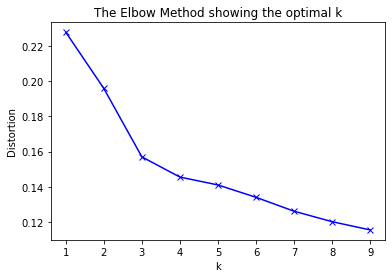

In [25]:
# Elbow curve
normalized_X = preprocessing.normalize(development_sample.drop(['ZCTA'],axis=1))
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=10,init='k-means++').fit(normalized_X)
    kmeanModel.fit(normalized_X)
    distortions.append(sum(np.min(cdist(normalized_X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / normalized_X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Clustering stability Check 

In [26]:
# Kmeans++
inst_kmeans = KMeans(init='k-means++',n_clusters=5,random_state=10,n_jobs=-1)
inst_kmeans.fit(X)
development_sample['clusters'] = inst_kmeans.labels_

In [27]:
validation_sample['clusters'] = inst_kmeans.predict(preprocessing.StandardScaler().fit_transform(validation_sample.drop(['ZCTA'],axis=1)))

In [28]:
# Frequency
development_sample.groupby(['clusters'])['clusters'].agg({'Development_sample_freq':'count'}).join(validation_sample.groupby(['clusters'])['clusters'].agg({'Validation_sample_freq':'count'}))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,Development_sample_freq,Validation_sample_freq
clusters,,
0,15,11.000
1,98,63.000
2,52,27.000
3,71,41.000
4,1,nan


In [29]:
development_sample.groupby(['clusters']).agg(np.mean)#.join(development_sample.groupby(['clusters'])['SRC_MEMBER_ID'].nunique())

,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO
clusters,,,,,,,,,,,
0,0.186,0.302,0.150,0.152,0.081,0.815,0.332,0.383,0.281,0.694,0.000
1,0.127,0.321,0.288,0.251,0.017,0.909,0.134,0.254,0.223,0.037,0.000
2,0.091,0.242,0.438,0.495,0.011,0.946,0.109,0.247,0.185,0.070,0.000
3,0.172,0.338,0.189,0.146,0.040,0.848,0.191,0.299,0.303,0.072,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [30]:
# Cluster mean across all features for validation sample
validation_sample.groupby(['clusters']).agg(np.mean)#.join(validation_sample.groupby(['clusters'])['SRC_MEMBER_ID'].nunique())

,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO
clusters,,,,,,,,,,,
0,0.166,0.287,0.114,0.108,0.086,0.816,0.396,0.378,0.267,0.770,0.000
1,0.130,0.330,0.262,0.217,0.025,0.896,0.147,0.252,0.226,0.034,0.000
2,0.108,0.259,0.393,0.414,0.018,0.928,0.120,0.326,0.195,0.134,0.000
3,0.172,0.326,0.182,0.157,0.046,0.823,0.196,0.350,0.313,0.127,0.000


In [31]:
# Euclidean distances between centroids#
pd.DataFrame(euclidean_distances(inst_kmeans.cluster_centers_))

,0,1,2,3,4
0,0.000,5.864,7.191,4.441,14.723
1,5.864,0.000,2.657,2.403,13.541
2,7.191,2.657,0.000,4.715,13.725
3,4.441,2.403,4.715,0.000,13.746
4,14.723,13.541,13.725,13.746,0.000


# Cluster ON Overall Data 

In [34]:
#Variable Standardization
X = data_for_cluster.drop(['ZCTA'],axis=1)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [35]:
# Kmeans++
inst_kmeans = KMeans(init='k-means++',n_clusters=5,random_state=0,n_jobs=-1)
inst_kmeans.fit(X)
data_for_cluster['clusters'] = inst_kmeans.labels_

# Dataset to merge with Heartland Base

In [36]:
data_for_cluster.rename(columns={'ZCTA':'ZIP'}, inplace = True)


In [37]:
print(data_for_cluster.shape)
data_for_cluster.head()

(379, 13)


,ZIP,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO,clusters
0,62801,0.198,0.312,0.190,0.128,0.047,0.911,0.212,0.316,0.281,0.097,0.000,1
1,63010,0.121,0.313,0.307,0.189,0.032,0.918,0.175,0.221,0.247,0.008,0.000,3
2,63011,0.097,0.188,0.469,0.530,0.010,0.946,0.106,0.220,0.154,0.024,0.000,0
3,63015,0.085,0.459,0.183,0.061,0.000,0.849,0.219,0.331,0.404,0.000,0.000,1
4,63016,0.130,0.331,0.212,0.140,0.031,0.893,0.202,0.196,0.238,0.001,0.000,3


In [38]:
clusters_with_ratios = data_for_cluster.groupby(['clusters']).agg(np.mean)
clusters_with_ratios

,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO
clusters,,,,,,,,,,,
0,0.097,0.250,0.423,0.450,0.012,0.942,0.115,0.255,0.190,0.075,0.000
1,0.173,0.330,0.189,0.147,0.041,0.841,0.188,0.312,0.311,0.079,0.000
2,0.177,0.297,0.134,0.135,0.082,0.806,0.342,0.393,0.276,0.669,0.000
3,0.129,0.331,0.269,0.237,0.022,0.902,0.141,0.263,0.224,0.043,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [39]:
clusters_zcta = data_for_cluster.groupby(['clusters'])['ZIP'].nunique()
clusters_zcta

clusters
0     87
1    105
2     31
3    155
4      1
Name: ZIP, dtype: int64

In [40]:
clusters5_heartland = pd.merge(clusters_with_ratios, clusters_zcta, how = 'left', on = 'clusters')

In [41]:
clusters5_heartland

,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO,ZIP
clusters,,,,,,,,,,,,
0,0.097,0.250,0.423,0.450,0.012,0.942,0.115,0.255,0.190,0.075,0.000,87
1,0.173,0.330,0.189,0.147,0.041,0.841,0.188,0.312,0.311,0.079,0.000,105
2,0.177,0.297,0.134,0.135,0.082,0.806,0.342,0.393,0.276,0.669,0.000,31
3,0.129,0.331,0.269,0.237,0.022,0.902,0.141,0.263,0.224,0.043,0.000,155
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


In [42]:
clusters5_heartland.ZIP.sum()

379

In [43]:
## Uncomment this line when it needs to be performed
#clusters5_heartland.to_csv('heartland_clusters5_2016.csv')

In [44]:
clusters5_heartland = pd.read_csv('heartland_clusters5_2016.csv', dtype={'ZIP':'str'})
print(clusters5_heartland.dtypes)
clusters5_heartland.head()

clusters                                  int64
DISABILITY_RATIO                        float64
25KTO50K_EARNINGS_RATIO                 float64
ABOVE_50K_EARNINGS_RATIO                float64
HIGHER_EDUCATION_RATIO                  float64
HH_FOODSTAMPS_ABOVE60_RATIO             float64
WITH_HEALTH_INSURANCE_COVERAGE_RATIO    float64
HH_MARRIED_COUPLE_RATIO                 float64
HH_LIVING_ALONE_RATIO                   float64
TOTAL_WIDOWED_DIVORCED_RATIO            float64
AFRICAN_AMERICAN_POP_RATIO              float64
WORK_TRANSPORT_PUBLIC_RATIO             float64
ZIP                                      object
dtype: object


,clusters,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO,ZIP
0,0,0.178,0.325,0.187,0.133,0.043,0.838,0.190,0.305,0.311,0.064,0.000,90
1,1,0.096,0.250,0.424,0.442,0.010,0.944,0.115,0.229,0.187,0.056,0.000,83
2,2,0.131,0.331,0.260,0.208,0.021,0.896,0.139,0.236,0.219,0.023,0.000,137
3,3,0.179,0.296,0.127,0.126,0.084,0.802,0.349,0.389,0.278,0.678,0.000,29
4,4,0.125,0.324,0.282,0.368,0.029,0.881,0.159,0.445,0.272,0.226,0.000,40


## Reading in Heartland Base Dataset

In [45]:
heartland_base = pd.read_csv('//mbip/medicarepBI/Projects/COE/Retention/Deliverables/DSNP_Clustering/Final_Data_Sets/heartland_base_with_ratios_20200826.csv',
                    usecols = heartland_cols, **kwargs,dtype={'ZIP':'str'})
print(heartland_base.shape)
heartland_base.head(3)

(4005, 97)


,MEDICARE_NUMBER,SRC_MEMBER_ID,INDIVIDUAL_ID,MEMBER_ID,CONTRACT_NUMBER,PBP,NEW_MARKET,SNP,LIS_FLAG,DUAL_STATUS,CMS_COUNTY,CMS_STATE,MA_REGION,NEW_REGION,MA_TERRITORY,AGE,GENDER,YEAR_EFF,MONTH_EFF,QUARTER_EFF,CITY,STATE,ZIP,SALES_CHANNEL,NEW_EFF_DATE,NEW_TERM_DATE,EFF_YEAR,EFF_MONTH,EFF_DAY,DSNP_MARKET,ABDOMEN_RELATED_DISORDER,ALLERGY,AUTOIMMUNE_DISEASE,BLOOD_RELATED_DISORDER,CANCER,DEMENTIA,DIABETES,DENTAL,EAR,FATIGUE,HEART_RELATED_DISORDER,HEPATITUS,HIV,HYPERLIPIDEMIA,HYPERTENSION,LUNGS_RELATED_DISORDER,LYME_DISEASE,MENTAL_DISORDER,NEURAL,OBESITY,ORTHOPEDIC,PERIPHERAL_ARTERY_DISEASE,PROSTATE,RENAL,REPRODUCTIVE,THYROID_DISORDER,VISION_RELATED_DISORDER,HIGH_NEED_GROUP,TERM_YEAR,TERM_MONTH,TENURE_IN_DAYS,TENURE_IN_MONTHS,LAST_6MON_LAB_VISITS,LAST_6MON_DENIED_CLAIMS,LAST_6MON_CALLS,LAST_6MON_PAR_CLAIMS,LAST_6MON_PAR_VISITS,LAST_6MON_NON_PAR_VISITS,LAST_6MON_DENTAL_VISITS,LAST_6MON_EMERGENCY_VISITS,LAST_6MON_PCP_VISITS,LAST_6MON_SPECIALIST_VISITS,LAST_6MON_AMBULANCE_EVENTS,LAST_6MON_BEHAVIORAL_HEALTH_VISITS,LAST_6MON_IP_VISITS,LAST_6MON_AETNA_MEDICAL_PAID_AMOUNT,LAST_6MON_MEMBER_MEDICAL_PAID_AMOUNT,LAST_6MON_GRIEVANCES,LAST_6MON_CTM,DISTINCT_GPI,MED_RISK_SCORE,CAPITATION_AMT,GROUP_ID,GROUP_NAME,TIN,TIN_NAME,VBC,PROVIDER_ID,PROVIDER_NAME,HICN_NBR,FIPS,SOCIAL_ISOLATION_INDEX_NORMALIZED,6_MONTH_UTILIZATION,MEMBER_EXPERIENCE,HEALTH_CONDITIONS,MEDICAL_COST,CLINICAL_CLUSTERS
0,1A93F62HC09,101000000000.000,7981740000000.000,10109800000000.000,H5325,5,HEARTLAND,Y,2,2,JEFFERSON,MO,NORTHCENTRAL,NORTHCENTRAL,MO_SAINT_LOUIS,54,F,2020,January,Q1,House Springs,MO,63051,CareFree,10/1/2019,4/30/2020,2019,10,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2020,4,304,10,0,0,0,2,2,0,0,0,0,2,0,0,0,144.950,144.300,0,0,6,0,0,919089220,"Ross, Kenneth E",830389948,"Ross, Kenneth E",VBC,455557609,"Ross, Kenneth E",1A93F62HC09,29099,46.260,2,0,2,289.250,4
1,1AQ7E08RH37,101000000000.000,53464430688.000,10106900000000.000,H5325,2,HEARTLAND,Y,2,1,SEDGWICK,KS,NORTHCENTRAL,NORTHCENTRAL,KS_WICHITA,66,F,2020,January,Q1,Haysville,KS,67060,CareFree,7/1/2019,12/31/2020,2019,7,1,KS/MO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2020,12,396,13,0,0,0,1,1,0,0,0,0,1,0,0,0,10.000,61.370,0,0,3,0,0,800677957,Wesley Physicians-Medical Specialties LLC,800677957,Wesley Physicians-Medical Specialties LLC,0,470448709,"Burke, Erika Jean",1AQ7E08RH37,20173,17.380,1,0,2,71.370,4
2,1C23GK3TK79,101000000000.000,45305545.000,10106800000000.000,H5325,3,HEARTLAND,Y,1,0,JACKSON,MO,NORTHCENTRAL,NORTHCENTRAL,KS_MO_KANSAS_CITY,70,F,2020,January,Q1,BLUE SPRINGS,MO,64014,House,1/1/2019,1/31/2020,2019,1,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,577,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,2,0,0,391904810,Carondelet Physician Services,472538324,Prime Healthcare Kansas City - Physicians Serv...,VBC,472949109,"Tebeest, Jacqueline D",1C23GK3TK79,29095,72.450,0,0,0,0.000,4


In [46]:
heartland_base.drop_duplicates(subset = 'MEDICARE_NUMBER', inplace = True)
heartland_base.shape

(4005, 97)

In [47]:
heartland_base_clinical_socio = pd.merge(heartland_base, data_for_cluster, how = 'left', on = 'ZIP')
print(heartland_base_clinical_socio.shape)
heartland_base_clinical_socio.head()

(4005, 109)


,MEDICARE_NUMBER,SRC_MEMBER_ID,INDIVIDUAL_ID,MEMBER_ID,CONTRACT_NUMBER,PBP,NEW_MARKET,SNP,LIS_FLAG,DUAL_STATUS,CMS_COUNTY,CMS_STATE,MA_REGION,NEW_REGION,MA_TERRITORY,AGE,GENDER,YEAR_EFF,MONTH_EFF,QUARTER_EFF,CITY,STATE,ZIP,SALES_CHANNEL,NEW_EFF_DATE,NEW_TERM_DATE,EFF_YEAR,EFF_MONTH,EFF_DAY,DSNP_MARKET,ABDOMEN_RELATED_DISORDER,ALLERGY,AUTOIMMUNE_DISEASE,BLOOD_RELATED_DISORDER,CANCER,DEMENTIA,DIABETES,DENTAL,EAR,FATIGUE,HEART_RELATED_DISORDER,HEPATITUS,HIV,HYPERLIPIDEMIA,HYPERTENSION,LUNGS_RELATED_DISORDER,LYME_DISEASE,MENTAL_DISORDER,NEURAL,OBESITY,ORTHOPEDIC,PERIPHERAL_ARTERY_DISEASE,PROSTATE,RENAL,REPRODUCTIVE,THYROID_DISORDER,VISION_RELATED_DISORDER,HIGH_NEED_GROUP,TERM_YEAR,TERM_MONTH,TENURE_IN_DAYS,TENURE_IN_MONTHS,LAST_6MON_LAB_VISITS,LAST_6MON_DENIED_CLAIMS,LAST_6MON_CALLS,LAST_6MON_PAR_CLAIMS,LAST_6MON_PAR_VISITS,LAST_6MON_NON_PAR_VISITS,LAST_6MON_DENTAL_VISITS,LAST_6MON_EMERGENCY_VISITS,LAST_6MON_PCP_VISITS,LAST_6MON_SPECIALIST_VISITS,LAST_6MON_AMBULANCE_EVENTS,LAST_6MON_BEHAVIORAL_HEALTH_VISITS,LAST_6MON_IP_VISITS,LAST_6MON_AETNA_MEDICAL_PAID_AMOUNT,LAST_6MON_MEMBER_MEDICAL_PAID_AMOUNT,LAST_6MON_GRIEVANCES,LAST_6MON_CTM,DISTINCT_GPI,MED_RISK_SCORE,CAPITATION_AMT,GROUP_ID,GROUP_NAME,TIN,TIN_NAME,VBC,PROVIDER_ID,PROVIDER_NAME,HICN_NBR,FIPS,SOCIAL_ISOLATION_INDEX_NORMALIZED,6_MONTH_UTILIZATION,MEMBER_EXPERIENCE,HEALTH_CONDITIONS,MEDICAL_COST,CLINICAL_CLUSTERS,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO,clusters
0,1A93F62HC09,101000000000.000,7981740000000.000,10109800000000.000,H5325,5,HEARTLAND,Y,2,2,JEFFERSON,MO,NORTHCENTRAL,NORTHCENTRAL,MO_SAINT_LOUIS,54,F,2020,January,Q1,House Springs,MO,63051,CareFree,10/1/2019,4/30/2020,2019,10,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2020,4,304,10,0,0,0,2,2,0,0,0,0,2,0,0,0,144.950,144.300,0,0,6,0,0,919089220,"Ross, Kenneth E",830389948,"Ross, Kenneth E",VBC,455557609,"Ross, Kenneth E",1A93F62HC09,29099,46.260,2,0,2,289.250,4,0.142,0.327,0.245,0.138,0.044,0.884,0.142,0.187,0.223,0.004,0.000,3.000
1,1AQ7E08RH37,101000000000.000,53464430688.000,10106900000000.000,H5325,2,HEARTLAND,Y,2,1,SEDGWICK,KS,NORTHCENTRAL,NORTHCENTRAL,KS_WICHITA,66,F,2020,January,Q1,Haysville,KS,67060,CareFree,7/1/2019,12/31/2020,2019,7,1,KS/MO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2020,12,396,13,0,0,0,1,1,0,0,0,0,1,0,0,0,10.000,61.370,0,0,3,0,0,800677957,Wesley Physicians-Medical Specialties LLC,800677957,Wesley Physicians-Medical Specialties LLC,0,470448709,"Burke, Erika Jean",1AQ7E08RH37,20173,17.380,1,0,2,71.370,4,0.107,0.388,0.242,0.149,0.017,0.912,0.214,0.232,0.286,0.002,0.000,3.000
2,1C23GK3TK79,101000000000.000,45305545.000,10106800000000.000,H5325,3,HEARTLAND,Y,1,0,JACKSON,MO,NORTHCENTRAL,NORTHCENTRAL,KS_MO_KANSAS_CITY,70,F,2020,January,Q1,BLUE SPRINGS,MO,64014,House,1/1/2019,1/31/2020,2019,1,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,577,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,2,0,0,391904810,Carondelet Physician Services,472538324,Prime Healthcare Kansas City - Physicians Serv...,VBC,472949109,"Tebeest, Jacqueline D",1C23GK3TK79,29095,72.450,0,0,0,0.000,4,0.095,0.309,0.341,0.311,0.014,0.928,0.177,0.220,0.267,0.089,0.000,3.000
3,1C23TK7PT05,101000000000.000,3704450000000.000,10108500000000.000,H5325,2,HEARTLAND,Y,1,1,SEDGWICK,KS,NORTHCENTRAL,NORTHCENTRAL,KS_WICHITA,76,M,2020,January,Q1,Wichita,KS,67218,NDP,10/1/2019,12/31/2020,2019,10,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,12,304,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,480993446,"Ascension Medical Group Via Christi, P.A.",480993446,"Ascension Medical Group Via Christi, P.A.",0,492490309,"Akers, Scott A",1C23TK7PT05,20173,73.920,0,0,0,0.000,4,0.137,0.332,0.163,0.218,0.034,0.818,0.208,0.403,0.336,0.186,0.

In [48]:
heartland_base_clinical_socio.rename(columns={'clusters':'SOCIO_ECONOMIC_CLUSTERS'}, inplace = True)
heartland_base_clinical_socio.head(2)

,MEDICARE_NUMBER,SRC_MEMBER_ID,INDIVIDUAL_ID,MEMBER_ID,CONTRACT_NUMBER,PBP,NEW_MARKET,SNP,LIS_FLAG,DUAL_STATUS,CMS_COUNTY,CMS_STATE,MA_REGION,NEW_REGION,MA_TERRITORY,AGE,GENDER,YEAR_EFF,MONTH_EFF,QUARTER_EFF,CITY,STATE,ZIP,SALES_CHANNEL,NEW_EFF_DATE,NEW_TERM_DATE,EFF_YEAR,EFF_MONTH,EFF_DAY,DSNP_MARKET,ABDOMEN_RELATED_DISORDER,ALLERGY,AUTOIMMUNE_DISEASE,BLOOD_RELATED_DISORDER,CANCER,DEMENTIA,DIABETES,DENTAL,EAR,FATIGUE,HEART_RELATED_DISORDER,HEPATITUS,HIV,HYPERLIPIDEMIA,HYPERTENSION,LUNGS_RELATED_DISORDER,LYME_DISEASE,MENTAL_DISORDER,NEURAL,OBESITY,ORTHOPEDIC,PERIPHERAL_ARTERY_DISEASE,PROSTATE,RENAL,REPRODUCTIVE,THYROID_DISORDER,VISION_RELATED_DISORDER,HIGH_NEED_GROUP,TERM_YEAR,TERM_MONTH,TENURE_IN_DAYS,TENURE_IN_MONTHS,LAST_6MON_LAB_VISITS,LAST_6MON_DENIED_CLAIMS,LAST_6MON_CALLS,LAST_6MON_PAR_CLAIMS,LAST_6MON_PAR_VISITS,LAST_6MON_NON_PAR_VISITS,LAST_6MON_DENTAL_VISITS,LAST_6MON_EMERGENCY_VISITS,LAST_6MON_PCP_VISITS,LAST_6MON_SPECIALIST_VISITS,LAST_6MON_AMBULANCE_EVENTS,LAST_6MON_BEHAVIORAL_HEALTH_VISITS,LAST_6MON_IP_VISITS,LAST_6MON_AETNA_MEDICAL_PAID_AMOUNT,LAST_6MON_MEMBER_MEDICAL_PAID_AMOUNT,LAST_6MON_GRIEVANCES,LAST_6MON_CTM,DISTINCT_GPI,MED_RISK_SCORE,CAPITATION_AMT,GROUP_ID,GROUP_NAME,TIN,TIN_NAME,VBC,PROVIDER_ID,PROVIDER_NAME,HICN_NBR,FIPS,SOCIAL_ISOLATION_INDEX_NORMALIZED,6_MONTH_UTILIZATION,MEMBER_EXPERIENCE,HEALTH_CONDITIONS,MEDICAL_COST,CLINICAL_CLUSTERS,DISABILITY_RATIO,25KTO50K_EARNINGS_RATIO,ABOVE_50K_EARNINGS_RATIO,HIGHER_EDUCATION_RATIO,HH_FOODSTAMPS_ABOVE60_RATIO,WITH_HEALTH_INSURANCE_COVERAGE_RATIO,HH_MARRIED_COUPLE_RATIO,HH_LIVING_ALONE_RATIO,TOTAL_WIDOWED_DIVORCED_RATIO,AFRICAN_AMERICAN_POP_RATIO,WORK_TRANSPORT_PUBLIC_RATIO,SOCIO_ECONOMIC_CLUSTERS
0,1A93F62HC09,101000000000.000,7981740000000.000,10109800000000.000,H5325,5,HEARTLAND,Y,2,2,JEFFERSON,MO,NORTHCENTRAL,NORTHCENTRAL,MO_SAINT_LOUIS,54,F,2020,January,Q1,House Springs,MO,63051,CareFree,10/1/2019,4/30/2020,2019,10,1,KS/MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2020,4,304,10,0,0,0,2,2,0,0,0,0,2,0,0,0,144.950,144.300,0,0,6,0,0,919089220,"Ross, Kenneth E",830389948,"Ross, Kenneth E",VBC,455557609,"Ross, Kenneth E",1A93F62HC09,29099,46.260,2,0,2,289.250,4,0.142,0.327,0.245,0.138,0.044,0.884,0.142,0.187,0.223,0.004,0.000,3.000
1,1AQ7E08RH37,101000000000.000,53464430688.000,10106900000000.000,H5325,2,HEARTLAND,Y,2,1,SEDGWICK,KS,NORTHCENTRAL,NORTHCENTRAL,KS_WICHITA,66,F,2020,January,Q1,Haysville,KS,67060,CareFree,7/1/2019,12/31/2020,2019,7,1,KS/MO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2020,12,396,13,0,0,0,1,1,0,0,0,0,1,0,0,0,10.000,61.370,0,0,3,0,0,800677957,Wesley Physicians-Medical Specialties LLC,800677957,Wesley Physicians-Medical Specialties LLC,0,470448709,"Burke, Erika Jean",1AQ7E08RH37,20173,17.380,1,0,2,71.370,4,0.107,0.388,0.242,0.149,0.017,0.912,0.214,0.232,0.286,0.002,0.000,3.000


In [49]:
## Creating Crosswalk Table
table1 = heartland_base_clinical_socio.groupby(['SOCIO_ECONOMIC_CLUSTERS','CLINICAL_CLUSTERS']).size().unstack()
table1

CLINICAL_CLUSTERS,1,2,3,4
SOCIO_ECONOMIC_CLUSTERS,,,,
0.000,207.000,14.000,36.000,213.000
1.000,748.000,36.000,128.000,704.000
2.000,330.000,22.000,52.000,322.000
3.000,543.000,43.000,82.000,522.000
4.000,1.000,nan,nan,nan


In [50]:
## Uncomment this line when it needs to be performed
#table1.to_csv('Heartland_crosstable_2016.csv')